In [ ]:
from google.colab import files
uploaded = files.upload()


for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle

Saving kaggle (4).json to kaggle (4).json
User uploaded file "kaggle (4).json" with length 66 bytes
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 79% 12.0M/15.1M [00:01<00:00, 18.0MB/s]
100% 15.1M/15.1M [00:01<00:00, 12.2MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
!unzip /content/brain-mri-images-for-brain-tumor-detection.zip -d /content/brain-mri-images-for-brain-tumor-detection


Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: /content/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/1 no.jpeg  
  inflating: /content/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/10 no.jpg  
  inflating: /content/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/11 no.jpg  
  inflating: /content/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/12 no.jpg  
  inflating: /content/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/13 no.jpg  
  inflating: /content/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/14 no.jpg  
  inflating: /content/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/15 no.jpg  
  inflating: /content/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/17 no.jpg  
  inflating: /content/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/18 no.jpg  
  inflating: /content/brain-mri-im

In [ ]:
import os
os.path.exists('/content/brain-mri-images-for-brain-tumor-detection')


True

In [ ]:
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# import deep learning libaries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Activation,BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")
print("modules loaded")


















modules loaded


Data Preprocessing

In [ ]:
data_dir = "/content/brain-mri-images-for-brain-tumor-detection"
filepaths = []
labels = []
if os.path.exists(data_dir):
  folds = os.listdir(data_dir)
  for fold in folds:
     foldpath = os.path.join(data_dir,fold)
     if os.path.isdir(foldpath):
       filelist = os.listdir(foldpath)
       for file in filelist:
         fpath = os.path.join(foldpath,file)
         filepaths.append(fpath)
         labels.append(fold)





Fseries = pd.Series(filepaths,name = "filepaths")
Lseries = pd.Series(labels,name = "labels")
df = pd.concat([Fseries,Lseries],axis = 1)
df.head()

,filepaths,labels
0,/content/brain-mri-images-for-brain-tumor-dete...,brain_tumor_dataset
1,/content/brain-mri-images-for-brain-tumor-dete...,brain_tumor_dataset
2,/content/brain-mri-images-for-brain-tumor-dete...,no
3,/content/brain-mri-images-for-brain-tumor-dete...,no
4,/content/brain-mri-images-for-brain-tumor-dete...,no


In [ ]:
df.head()

,filepaths,labels
0,/content/brain-mri-images-for-brain-tumor-dete...,brain_tumor_dataset
1,/content/brain-mri-images-for-brain-tumor-dete...,brain_tumor_dataset
2,/content/brain-mri-images-for-brain-tumor-dete...,no
3,/content/brain-mri-images-for-brain-tumor-dete...,no
4,/content/brain-mri-images-for-brain-tumor-dete...,no


In [ ]:
counts =df.labels.value_counts()
counts

,count
labels,
yes,155
no,98
brain_tumor_dataset,2


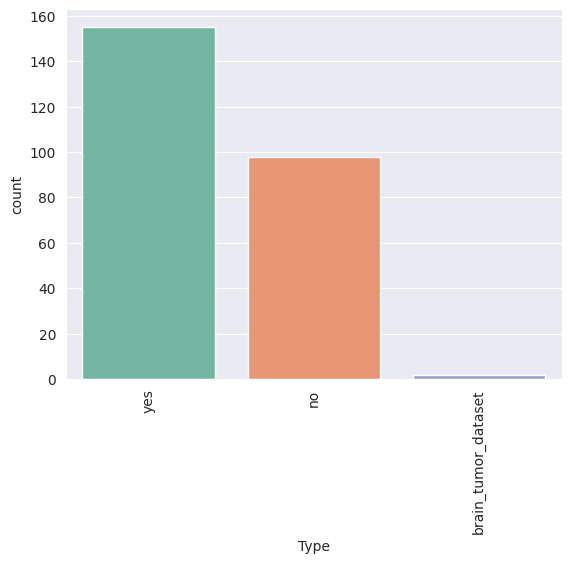

In [ ]:
counts = df.labels.value_counts()
sns.barplot(x =counts.index,y = counts,palette ="Set2")
plt.xlabel("Type")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
strat = df["labels"]
train_df,test_df = train_test_split(df,train_size =0.8,shuffle = True,random_state =123,stratify =strat)

In [ ]:
#create an image data generator

In [ ]:
batch_size = 8
img_size = (224,224)
channels = 3
img_shape = (img_size[0],img_size[1],channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
train_gen = tr_gen.flow_from_dataframe(train_df,x_col = "filepaths",y_col = "labels",target_size = img_size,class_mode = "categorical",color_mode = "rgb",shuffle = True,batch_size = batch_size)
test_gen = ts_gen.flow_from_dataframe(test_df,x_col ="filepaths",y_col = "labels",target_size = img_size,class_mode = "categorical",color_mode = "rgb",shuffle = False,batch_size = batch_size)

Found 202 validated image filenames belonging to 2 classes.
Found 51 validated image filenames belonging to 2 classes.


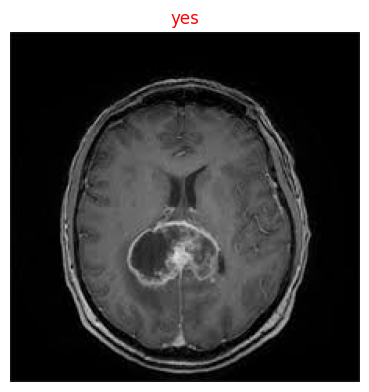

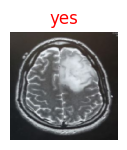

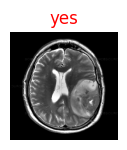

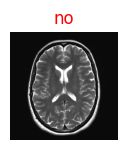

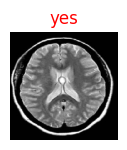

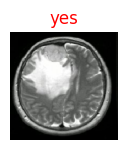

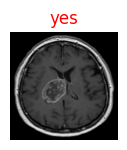

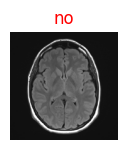

In [ ]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images,labels = next(train_gen)
plt.figure(figsize = (28,10))
for i in range(8):
  plt.subplot(2,4,i+1)
  image = images[i]/255
  plt.imshow(image)
  index = np.argmax(labels[i])
  class_name = classes[index]
  plt.title(class_name,color = "red",fontsize = 12)
  plt.axis("off")
  plt.show()

**Genric  model creation**

In [ ]:
from tensorflow.keras.losses import categorical_crossentropy
img_size = (224,224)
channels = 3
img_shape = (img_size[0],img_size[1],channels)
class_count = len(list(train_gen.class_indices.keys()))
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False,weights ="imagenet",input_shape = img_shape,pooling = "max")
model = Sequential([
    base_model,
    BatchNormalization(axis = -1,momentum =.99,epsilon = 0.001),
    Dense(256,kernel_regularizer =  regularizers.l2(l2 = 0.01),activity_regularizer=regularizers.l1(0.006),activation="relu" ),
    Dropout(rate =0.45,seed = 123),
    Dense(class_count,activation="softmax")
])
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=categorical_crossentropy,
    metrics=["accuracy"]
)
model.summary()




Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 1536)                │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1536)                │           6,144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,183,665 (42.66 MB)

 Trainable params: 11,093,290 (42.32 MB)

 Non-trainable params: 90,375 (353.03 KB)

In [ ]:
epochs = 50
history = model.fit(x= train_gen,epochs = epochs,verbose =1,validation_data = test_gen,validation_steps = None,shuffle = False)




Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 194s 4s/step - accuracy: 0.6122 - loss: 11.6378 - val_accuracy: 0.7451 - val_loss: 19.4106
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.7233 - loss: 7.6450 - val_accuracy: 0.6275 - val_loss: 8.9479
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - accuracy: 0.6610 - loss: 6.2800 - val_accuracy: 0.6078 - val_loss: 5.3600
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.6652 - loss: 5.6354 - val_accuracy: 0.6471 - val_loss: 8.6673
Epoch 5/50
 7/26 ━━━━━━━━━━━━━━━━━━━━ 1:17 4s/step - accuracy: 0.7071 - loss: 4.9531